<a href="https://colab.research.google.com/github/teamHC-G12/Cervical-Cancer-Risk-Classification/blob/master/datascience_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cervical Cancer Risk Classification

# Loading the required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

#  Reading and Understanding the data

In [0]:
df=pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")

pd.set_option('display.max_columns', 40)

In [76]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [77]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

* We can see that the columns names contains spaces and colons. So renaming the columns for convenience

In [0]:
df.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']

## Checking the datatypes

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   No_of_sex_partner                   858 non-null    object
 2   First_sexual_intercourse            858 non-null    object
 3   No_pregnancies                      858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes_yrs                          858 non-null    object
 6   Smokes_packs_yr                     858 non-null    object
 7   Hormonal_Contraceptives             858 non-null    object
 8   Hormonal_Contraceptives_years       858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD_years                           858 non-null    object
 11  STDs                                858 non-null    object

* Predominant of the features are of categorical and remaining are of numerical.

## Checking the dimensions

In [80]:
df.shape

(858, 36)

* We have a total of 858 records and 36 different features.

## Checking for missing values

* So, first we are replacing '?' with Numpy NaN values.

In [0]:
## replace ? with NaN
df = df.replace('?', np.NaN)

## Checking the % of missing values in each feature

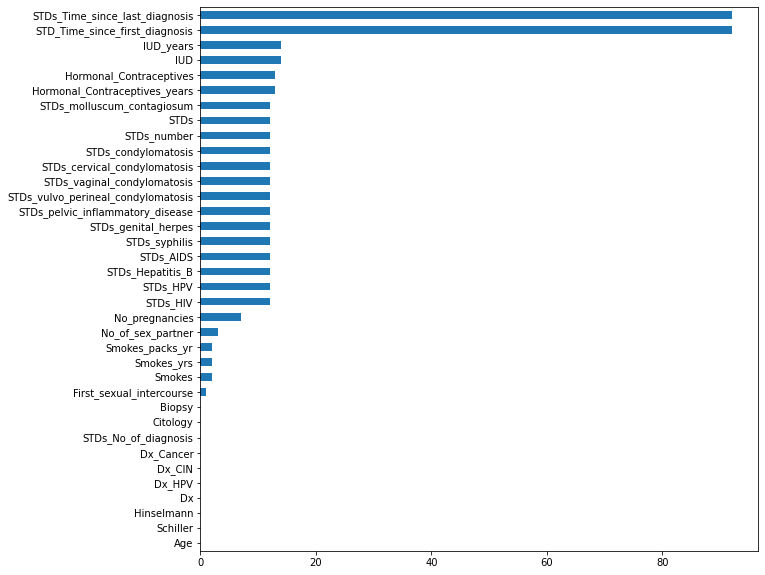

In [82]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

In [0]:
df=df.drop(['STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis'],axis=1)
df=df.drop(df.index[df.Smokes.isnull()] | df.index[df.First_sexual_intercourse.isnull()])

## Partioning the features manually into categorical and numerical

In [0]:
x_features=list(df.columns)
x_features.remove('Biopsy')

In [85]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical

['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [86]:
x_features_numerical=[i for i in x_features if i not in x_features_categorical]
x_features_numerical

['Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']

# Missing Values Imputation

As the dataset is a sensitive and medical one, we are not going to use the method of imputation using Mean or Median or Mode.
Instead here we have used Machine Learning Models to fill the missing values.
The steps followed are : 
1. Remove the column that needs to be imputed from the independent columns list.
2. For everyother independent column in the list (other than the column we are going to impute), fill the null values with mode/median depending on their datatype.
3. The concept in ML based imputation is that, we will choose the column that needs to be imputed as our 'Y' and remaining all as 'X' (basically in Step 2, we are imputing X columns so that X columns wont have missing values while training the model)
4. So now, Y alone will be having null values that needs to be imputed.
5. Test data will be those records that contains missing values of Y where as training records will be those records that have filled values of Y.
6. So we build a ML model and train it with filled values and predict the missing values of Y.
7. For Numerical columns we choosed DecisionTreeRegressor and for Categorical columns we built DecisionTreeClassifier models.

### Missing Value Imputation of IUD

In [0]:
df_iud=df.copy()

x_features_categorical.remove('IUD')
for i in x_features_categorical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].mode()[0])
for i in x_features_numerical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].median())
    
df_iud=df_iud.astype('float')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(0,'no')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(1,'yes')
df_iud=pd.get_dummies(df_iud)

train_iud=df_iud[df_iud.IUD.isnull()==False]
test_iud=df_iud[df_iud.IUD.isnull()]

train_iud_x=train_iud.drop('IUD',axis=1)
train_iud_y=train_iud['IUD']

test_iud_x=test_iud.drop('IUD',axis=1)
test_iud_y=test_iud['IUD']

dt=DecisionTreeClassifier()
iud_model=dt.fit(train_iud_x,train_iud_y)
test_iud['IUD']=iud_model.predict(test_iud_x)

iud_complete=pd.concat([train_iud,test_iud],axis=0)

df_impute=df.copy()
df_impute['IUD']=iud_complete['IUD'].sort_index()

* df_impute is the new dataframe that contains missing values imputed columns

### Missing Value Imputation for IUD_years

#### Here we can impute the missing values of IUD years considering the following reasons
- For all the zero values of IUD_years, the value of IUD is zero.
- For the zero values of IUD , the value of IUD_years is zero.
- The predicted value of IUD is completely zero and hence we can consider that the predicted value of IUD years will also be zero.

In [0]:
x_features_numerical.remove('IUD_years')
df_impute['IUD_years']=df_impute['IUD_years'].fillna(0)

### Missing Value Imputation for Hormonal_Contraceptives

In [0]:
df_hor=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('Hormonal_Contraceptives')
for i in x_features_categorical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].mode()[0])
for i in x_features_numerical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].median())
    
df_hor=df_hor.astype('float')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(0,'no')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(1,'yes')
df_hor=pd.get_dummies(df_hor)

train_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()==False]
test_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()]

train_hor_x=train_hor.drop('Hormonal_Contraceptives',axis=1)
train_hor_y=train_hor['Hormonal_Contraceptives']

test_hor_x=test_hor.drop('Hormonal_Contraceptives',axis=1)
test_hor_y=test_hor['Hormonal_Contraceptives']

dt=DecisionTreeClassifier()
hor_model=dt.fit(train_hor_x,train_hor_y)
test_hor['Hormonal_Contraceptives']=hor_model.predict(test_hor_x)

hor_complete=pd.concat([train_hor,test_hor],axis=0)

df_impute['Hormonal_Contraceptives']=hor_complete['Hormonal_Contraceptives'].sort_index()

### Missing Value Imputation for Hormonal_Contraceptives_Years

In [0]:
df_hor_y=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('Hormonal_Contraceptives_years')
for i in x_features_categorical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].mode()[0])

for i in x_features_numerical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].median())

df_hor_y=df_hor_y.astype('float')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(0,'no')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(1,'yes')
df_hor_y=pd.get_dummies(df_hor_y)

train_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()==False]
test_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()]

train_hor_yrs_x=train_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
train_hor_yrs_y=train_hor_yrs['Hormonal_Contraceptives_years']

test_hor_yrs_x=test_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
test_hor_yrs_y=test_hor_yrs['Hormonal_Contraceptives_years']

dt=DecisionTreeRegressor()
hor_yrs_model=dt.fit(train_hor_yrs_x,train_hor_yrs_y)
test_hor_yrs['Hormonal_Contraceptives_years']=hor_yrs_model.predict(test_hor_yrs_x)

hor_yrs_complete=pd.concat([train_hor_yrs,test_hor_yrs],axis=0)

df_impute['Hormonal_Contraceptives_years']=hor_yrs_complete['Hormonal_Contraceptives_years'].sort_index()

### Missing Value Imputation for STDs

In [0]:
df_std=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs')
for i in x_features_categorical:
    df_std[i]=df_std[i].fillna(df_std[i].mode()[0])
for i in x_features_numerical:
    df_std[i]=df_std[i].fillna(df_std[i].median())
    
df_std=df_std.astype('float')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(0,'no')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(1,'yes')
df_std=pd.get_dummies(df_std)

train_std=df_std[df_std.STDs.isnull()==False]
test_std=df_std[df_std.STDs.isnull()]

train_std_x=train_std.drop('STDs',axis=1)
train_std_y=train_std['STDs']

test_std_x=test_std.drop('STDs',axis=1)
test_std_y=test_std['STDs']

dt=DecisionTreeClassifier()
std_model=dt.fit(train_std_x,train_std_y)
test_std['STDs']=std_model.predict(test_std_x)

std_complete=pd.concat([train_std,test_std],axis=0)

df_impute['STDs']=std_complete['STDs'].sort_index()

### Missing Value Imputation for STDs_Number

In [0]:
df_std_num=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('STDs_number')
for i in x_features_categorical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].mode()[0])
for i in x_features_numerical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].median())

df_std_num=df_std_num.astype('float')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(0,'no')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(1,'yes')
df_std_num=pd.get_dummies(df_std_num)

train_std_num=df_std_num[df_std_num.STDs_number.isnull()==False]
test_std_num=df_std_num[df_std_num.STDs_number.isnull()]

train_std_num_x=train_std_num.drop('STDs_number',axis=1)
train_std_num_y=train_std_num['STDs_number']

test_std_num_x=test_std_num.drop('STDs_number',axis=1)
test_std_num_y=test_std_num['STDs_number']

dt=DecisionTreeRegressor()
std_model_num=dt.fit(train_std_num_x,train_std_num_y)
test_std_num['STDs_number']=std_model_num.predict(test_std_num_x)

std_num_complete=pd.concat([train_std_num,test_std_num],axis=0)

df_impute['STDs_number']=std_num_complete['STDs_number'].sort_index()

### Missing Value Imputation for STDs_condylomatosis

In [0]:
df_std_con=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_condylomatosis')
for i in x_features_categorical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].mode()[0])
for i in x_features_numerical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].median())

df_std_con=df_std_con.astype('float')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(0,'no')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(1,'yes')
df_std_con=pd.get_dummies(df_std_con)

train_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()==False]
test_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()]

train_std_con_x=train_std_con.drop('STDs_condylomatosis',axis=1)
train_std_con_y=train_std_con['STDs_condylomatosis']

test_std_con_x=test_std_con.drop('STDs_condylomatosis',axis=1)
test_std_con_y=test_std_con['STDs_condylomatosis']

dt=DecisionTreeClassifier()
std_model_con=dt.fit(train_std_con_x,train_std_con_y)
test_std_con['STDs_condylomatosis']=std_model_con.predict(test_std_con_x)

std_con_complete=pd.concat([train_std_con,test_std_con],axis=0)

df_impute['STDs_condylomatosis']=std_con_complete['STDs_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_cervical_condylomatosis

In [0]:
df_std_cerv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_cervical_condylomatosis')
for i in x_features_categorical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].mode()[0])
for i in x_features_numerical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].median())

df_std_cerv=df_std_cerv.astype('float')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(0,'no')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(1,'yes')
df_std_cerv=pd.get_dummies(df_std_cerv)

train_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()==False]
test_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()]

train_std_cerv_x=train_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
train_std_cerv_y=train_std_cerv['STDs_cervical_condylomatosis']

test_std_cerv_x=test_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
test_std_cerv_y=test_std_cerv['STDs_cervical_condylomatosis']

dt=DecisionTreeClassifier()
std_model_cerv=dt.fit(train_std_cerv_x,train_std_cerv_y)
test_std_cerv['STDs_cervical_condylomatosis']=std_model_cerv.predict(test_std_cerv_x)

std_cerv_complete=pd.concat([train_std_cerv,test_std_cerv],axis=0)

df_impute['STDs_cervical_condylomatosis']=std_cerv_complete['STDs_cervical_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_vaginal_condylomatosis

In [0]:
df_std_vagi=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vaginal_condylomatosis')
for i in x_features_categorical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].mode()[0])
for i in x_features_numerical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].median())

df_std_vagi=df_std_vagi.astype('float')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(0,'no')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(1,'yes')
df_std_vagi=pd.get_dummies(df_std_vagi)

train_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()==False]
test_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()]

train_std_vagi_x=train_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
train_std_vagi_y=train_std_vagi['STDs_vaginal_condylomatosis']

test_std_vagi_x=test_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
test_std_vagi_y=test_std_vagi['STDs_vaginal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_vagi=dt.fit(train_std_vagi_x,train_std_vagi_y)
test_std_vagi['STDs_vaginal_condylomatosis']=std_model_vagi.predict(test_std_vagi_x)

std_vagi_complete=pd.concat([train_std_vagi,test_std_vagi],axis=0)

df_impute['STDs_vaginal_condylomatosis']=std_vagi_complete['STDs_vaginal_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_vulvo_perineal_condylomatosis 

In [0]:
df_std_peri=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vulvo_perineal_condylomatosis')
for i in x_features_categorical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].mode()[0])
for i in x_features_numerical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].median())

df_std_peri=df_std_peri.astype('float')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(0,'no')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(1,'yes')
df_std_peri=pd.get_dummies(df_std_peri)

train_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()==False]
test_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()]

train_std_peri_x=train_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
train_std_peri_y=train_std_peri['STDs_vulvo_perineal_condylomatosis']

test_std_peri_x=test_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
test_std_peri_y=test_std_peri['STDs_vulvo_perineal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_peri=dt.fit(train_std_peri_x,train_std_peri_y)
test_std_peri['STDs_vulvo_perineal_condylomatosis']=std_model_peri.predict(test_std_peri_x)

std_peri_complete=pd.concat([train_std_peri,test_std_peri],axis=0)

df_impute['STDs_vulvo_perineal_condylomatosis']=std_peri_complete['STDs_vulvo_perineal_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_syphilis 

In [0]:
df_std_syp=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_syphilis')
for i in x_features_categorical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].mode()[0])
for i in x_features_numerical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].median())

df_std_syp=df_std_syp.astype('float')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(0,'no')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(1,'yes')
df_std_syp=pd.get_dummies(df_std_syp)

train_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()==False]
test_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()]

train_std_syp_x=train_std_syp.drop('STDs_syphilis',axis=1)
train_std_syp_y=train_std_syp['STDs_syphilis']

test_std_syp_x=test_std_syp.drop('STDs_syphilis',axis=1)
test_std_syp_y=test_std_syp['STDs_syphilis']

dt=DecisionTreeClassifier()
std_model_syp=dt.fit(train_std_syp_x,train_std_syp_y)
test_std_syp['STDs_syphilis']=std_model_syp.predict(test_std_syp_x)

std_syp_complete=pd.concat([train_std_syp,test_std_syp],axis=0)

df_impute['STDs_syphilis']=std_syp_complete['STDs_syphilis'].sort_index()

### Missing Value Imputation for STDs_pelvic_inflammatory_disease

In [0]:
df_std_pelv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_pelvic_inflammatory_disease')
for i in x_features_categorical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].mode()[0])

for i in x_features_numerical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].median())                          

df_std_pelv=df_std_pelv.astype('float')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(0,'no')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(1,'yes')
df_std_pelv=pd.get_dummies(df_std_pelv)

train_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()==False]
test_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()]

train_std_pelv_x=train_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
train_std_pelv_y=train_std_pelv['STDs_pelvic_inflammatory_disease']

test_std_pelv_x=test_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
test_std_pelv_y=test_std_pelv['STDs_pelvic_inflammatory_disease']

dt=DecisionTreeClassifier()
std_model_pelv=dt.fit(train_std_pelv_x,train_std_pelv_y)
test_std_pelv['STDs_pelvic_inflammatory_disease']=std_model_pelv.predict(test_std_pelv_x)

std_pelv_complete=pd.concat([train_std_pelv,test_std_pelv],axis=0)

df_impute['STDs_pelvic_inflammatory_disease']=std_pelv_complete['STDs_pelvic_inflammatory_disease'].sort_index()

### Missing Value Imputation for STDs_genital_herpes

In [0]:
df_std_geni=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_genital_herpes')
for i in x_features_categorical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].mode()[0])
for i in x_features_numerical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].median())

df_std_geni=df_std_geni.astype('float')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(0,'no')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(1,'yes')
df_std_geni=pd.get_dummies(df_std_geni)

train_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()==False]
test_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()]

train_std_geni_x=train_std_geni.drop('STDs_genital_herpes',axis=1)
train_std_geni_y=train_std_geni['STDs_genital_herpes']

test_std_geni_x=test_std_geni.drop('STDs_genital_herpes',axis=1)
test_std_geni_y=test_std_geni['STDs_genital_herpes']

dt=DecisionTreeClassifier()
std_model_geni=dt.fit(train_std_geni_x,train_std_geni_y)
test_std_geni['STDs_genital_herpes']=std_model_geni.predict(test_std_geni_x)

std_geni_complete=pd.concat([train_std_geni,test_std_geni],axis=0)

df_impute['STDs_genital_herpes']=std_geni_complete['STDs_genital_herpes'].sort_index()

### Missing Value Imputation for STDs_molluscum_contagiosum

In [0]:
df_std_mollu=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_molluscum_contagiosum')
for i in x_features_categorical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].mode()[0])
for i in x_features_numerical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].median())

df_std_mollu=df_std_mollu.astype('float')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(0,'no')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(1,'yes')
df_std_mollu=pd.get_dummies(df_std_mollu)

train_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()==False]
test_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()]

train_std_mollu_x=train_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
train_std_mollu_y=train_std_mollu['STDs_molluscum_contagiosum']

test_std_mollu_x=test_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
test_std_mollu_y=test_std_mollu['STDs_molluscum_contagiosum']

dt=DecisionTreeClassifier()
std_model_mollu=dt.fit(train_std_mollu_x,train_std_mollu_y)
test_std_mollu['STDs_molluscum_contagiosum']=std_model_mollu.predict(test_std_mollu_x)

std_mollu_complete=pd.concat([train_std_mollu,test_std_mollu],axis=0)

df_impute['STDs_molluscum_contagiosum']=std_mollu_complete['STDs_molluscum_contagiosum'].sort_index()

### Missing Value Imputation for STDs_AIDS

In [0]:
df_std_aids=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_AIDS')
for i in x_features_categorical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].mode()[0])
for i in x_features_numerical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].median())

df_std_aids=df_std_aids.astype('float')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(0,'no')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(1,'yes')
df_std_aids=pd.get_dummies(df_std_aids)

train_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()==False]
test_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()]

train_std_aids_x=train_std_aids.drop('STDs_AIDS',axis=1)
train_std_aids_y=train_std_aids['STDs_AIDS']

test_std_aids_x=test_std_aids.drop('STDs_AIDS',axis=1)
test_std_aids_y=test_std_aids['STDs_AIDS']

dt=DecisionTreeClassifier()
std_model_aids=dt.fit(train_std_aids_x,train_std_aids_y)
test_std_aids['STDs_AIDS']=std_model_aids.predict(test_std_aids_x)

std_aids_complete=pd.concat([train_std_aids,test_std_aids],axis=0)

df_impute['STDs_AIDS']=std_aids_complete['STDs_AIDS'].sort_index()

### Missing Value Imputation for STDs_HIV

In [0]:
df_std_hiv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HIV')
for i in x_features_categorical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].mode()[0])
for i in x_features_numerical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].median())

df_std_hiv=df_std_hiv.astype('float')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(0,'no')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(1,'yes')
df_std_hiv=pd.get_dummies(df_std_hiv)

train_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()==False]
test_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()]

train_std_hiv_x=train_std_hiv.drop('STDs_HIV',axis=1)
train_std_hiv_y=train_std_hiv['STDs_HIV']

test_std_hiv_x=test_std_hiv.drop('STDs_HIV',axis=1)
test_std_hiv_y=test_std_hiv['STDs_HIV']

dt=DecisionTreeClassifier()
std_model_hiv=dt.fit(train_std_hiv_x,train_std_hiv_y)
test_std_hiv['STDs_HIV']=std_model_hiv.predict(test_std_hiv_x)

std_hiv_complete=pd.concat([train_std_hiv,test_std_hiv],axis=0)

df_impute['STDs_HIV']=std_hiv_complete['STDs_HIV'].sort_index()

### Missing Value Imputation for STDs_Hepatitis_B

In [0]:
df_std_hepa=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_Hepatitis_B')
for i in x_features_categorical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].mode()[0])
for i in x_features_numerical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].median())

df_std_hepa=df_std_hepa.astype('float')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(0,'no')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(1,'yes')
df_std_hepa=pd.get_dummies(df_std_hepa)

train_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()==False]
test_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()]

train_std_hepa_x=train_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
train_std_hepa_y=train_std_hepa['STDs_Hepatitis_B']

test_std_hepa_x=test_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
test_std_hepa_y=test_std_hepa['STDs_Hepatitis_B']

dt=DecisionTreeClassifier()
std_model_hepa=dt.fit(train_std_hepa_x,train_std_hepa_y)
test_std_hepa['STDs_Hepatitis_B']=std_model_hepa.predict(test_std_hepa_x)

std_hepa_complete=pd.concat([train_std_hepa,test_std_hepa],axis=0)

df_impute['STDs_Hepatitis_B']=std_hepa_complete['STDs_Hepatitis_B'].sort_index()

### Missing Value Imputation for STDs_HPV

In [0]:
df_std_hpv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HPV')
for i in x_features_categorical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].mode()[0])
for i in x_features_numerical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].median())

df_std_hpv=df_std_hpv.astype('float')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(0,'no')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(1,'yes')
df_std_hpv=pd.get_dummies(df_std_hpv)

train_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()==False]
test_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()]

train_std_hpv_x=train_std_hpv.drop(['STDs_HPV'],axis=1)
train_std_hpv_y=train_std_hpv['STDs_HPV']

test_std_hpv_x=test_std_hpv.drop(['STDs_HPV'],axis=1)
test_std_hpv_y=test_std_hpv['STDs_HPV']

dt=DecisionTreeClassifier()
std_model_hpv=dt.fit(train_std_hpv_x,train_std_hpv_y)
test_std_hpv['STDs_HPV']=std_model_hpv.predict(test_std_hpv_x)

std_hpv_complete=pd.concat([train_std_hpv,test_std_hpv],axis=0)

df_impute['STDs_HPV']=std_hpv_complete['STDs_HPV'].sort_index()

### Missing Value Imputation for No_pregnancies

In [0]:
df_no_preg=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_pregnancies')
for i in x_features_numerical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].median())
for i in x_features_categorical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].mode()[0])

df_no_preg=df_no_preg.astype('float')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(0,'no')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(1,'yes')
df_no_preg=pd.get_dummies(df_no_preg)

train_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()==False]
test_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()]

train_no_preg_x=train_no_preg.drop(['No_pregnancies'],axis=1)
train_no_preg_y=train_no_preg['No_pregnancies']

test_no_preg_x=test_no_preg.drop(['No_pregnancies'],axis=1)
test_no_preg_y=test_no_preg['No_pregnancies']

dt=DecisionTreeRegressor()
model_no_preg=dt.fit(train_no_preg_x,train_no_preg_y)
test_no_preg['No_pregnancies']=model_no_preg.predict(test_no_preg_x)

no_preg_complete=pd.concat([train_no_preg,test_no_preg],axis=0)

df_impute['No_pregnancies']=no_preg_complete['No_pregnancies'].sort_index()

### Missing Value Imputation for No_of_sex_partner

In [0]:
df_no_sexptnr=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_of_sex_partner')
for i in x_features_numerical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].median())
for i in x_features_categorical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].mode()[0])

df_no_sexptnr=df_no_sexptnr.astype('float')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(0,'no')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(1,'yes')
df_no_sexptnr=pd.get_dummies(df_no_sexptnr)

train_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()==False]
test_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()]

train_no_sexptnr_x=train_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
train_no_sexptnr_y=train_no_sexptnr['No_of_sex_partner']

test_no_sexptnr_x=test_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
test_no_sexptnr_y=test_no_sexptnr['No_of_sex_partner']

dt=DecisionTreeRegressor()
model_no_sexptnr=dt.fit(train_no_sexptnr_x,train_no_sexptnr_y)
test_no_sexptnr['No_of_sex_partner']=model_no_sexptnr.predict(test_no_sexptnr_x)

no_sexptnr_complete=pd.concat([train_no_sexptnr,test_no_sexptnr],axis=0)

df_impute['No_of_sex_partner']=no_sexptnr_complete['No_of_sex_partner'].sort_index()

In [107]:
df_impute.isnull().sum()

Age                                   0
No_of_sex_partner                     0
First_sexual_intercourse              0
No_pregnancies                        0
Smokes                                0
Smokes_yrs                            0
Smokes_packs_yr                       0
Hormonal_Contraceptives               0
Hormonal_Contraceptives_years         0
IUD                                   0
IUD_years                             0
STDs                                  0
STDs_number                           0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo_perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0
STDs_HPV                              0


* Finally we have imputed all the columns those had null values.

In [108]:
df_impute[['Age','No_pregnancies', 'No_of_sex_partner',
 'First_sexual_intercourse',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'STDs_No_of_diagnosis', 'Hormonal_Contraceptives_years', 'IUD_years', 'STDs_number']].describe()

,Age,No_pregnancies,No_of_sex_partner,STDs_No_of_diagnosis,Hormonal_Contraceptives_years,STDs_number
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,26.812649,2.274861,2.508950,0.084726,2.367016,0.151551
std,8.529209,1.441879,1.587429,0.295293,3.866744,0.521638
min,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,2.000000,0.000000,0.500000,0.000000
75%,32.000000,3.000000,3.000000,0.000000,3.000000,0.000000
max,84.000000,11.000000,28.000000,3.000000,30.000000,4.000000


* Just had a quick look at the Stats of the numerical features

In [0]:
df_impute.to_csv('df_imputation.csv')

* So, as we have done with null values imputation, lets move on to EXPLORATORY DATA ANALYSIS

# EDA

In [0]:
df = pd.read_csv('df_imputation.csv', index_col=0) #df_imputation is the new CSV file that doesn't have any null values.

#Again manually segregating categorical and numerical colmuns

x_features_categorical = ['Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis',
                          'STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis',
                          'STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS',
                          'STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx', 'Hinselmann', 'Citology', 'Biopsy']

x_features_numerical = [x for x in df.columns if x not in x_features_categorical]

### Uni Variate Analysis

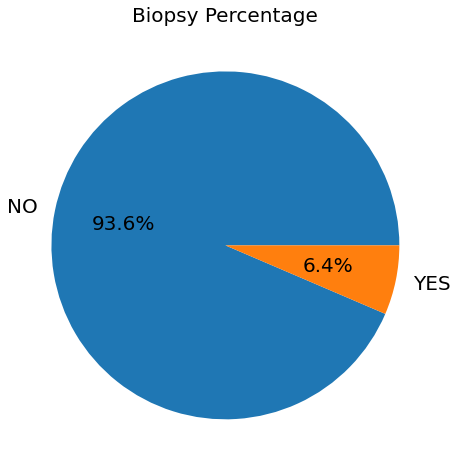

In [111]:
impute = df.copy()
impute=df.astype('float')

plt.figure(figsize = (12,8))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=20)
plt.show()

Count Plots of Categorical Columns

****************************************************************************************************


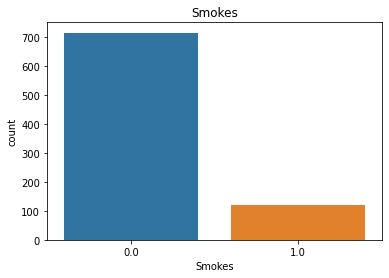

****************************************************************************************************


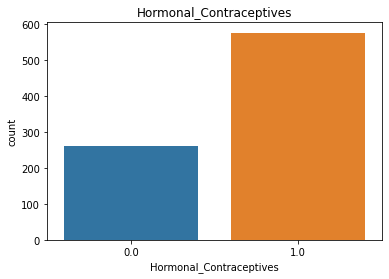

****************************************************************************************************


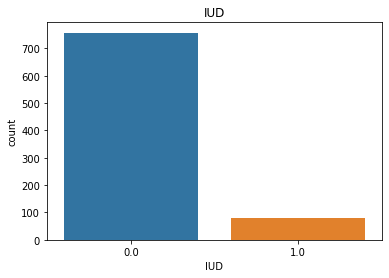

****************************************************************************************************


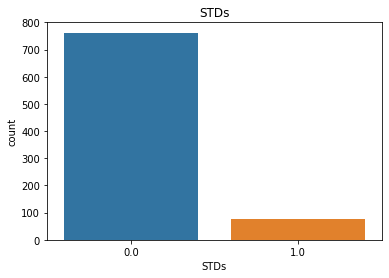

****************************************************************************************************


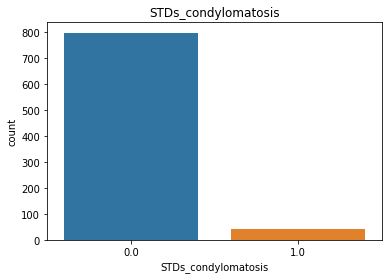

****************************************************************************************************


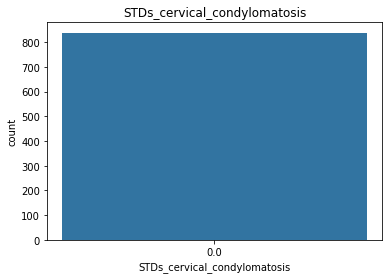

****************************************************************************************************


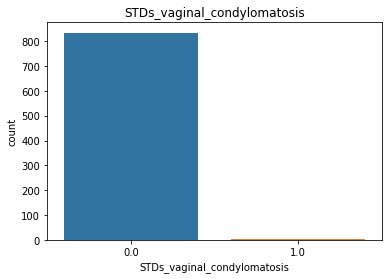

****************************************************************************************************


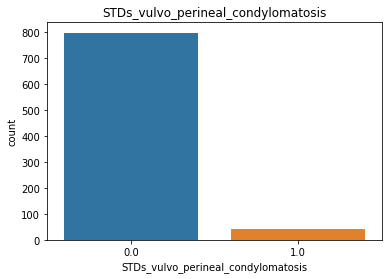

****************************************************************************************************


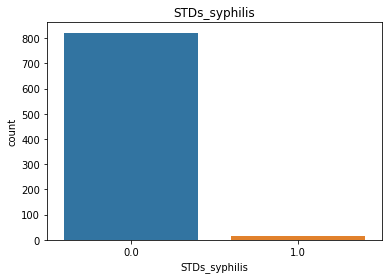

****************************************************************************************************


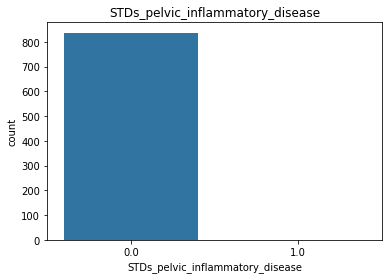

****************************************************************************************************


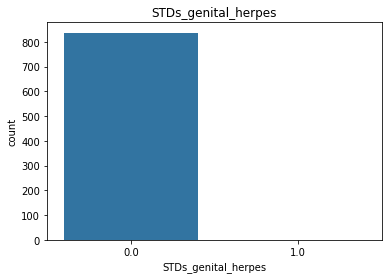

****************************************************************************************************


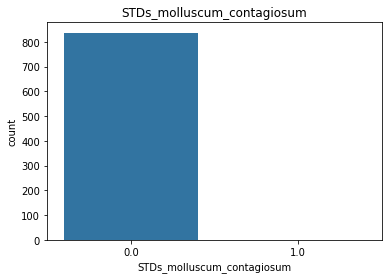

****************************************************************************************************


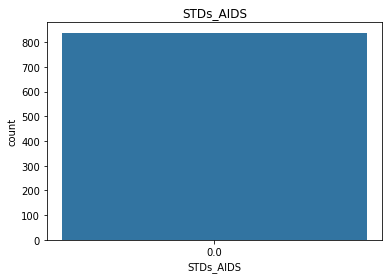

****************************************************************************************************


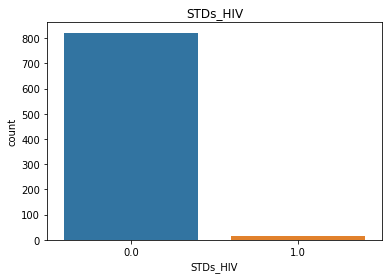

****************************************************************************************************


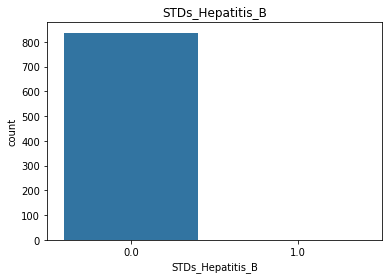

****************************************************************************************************


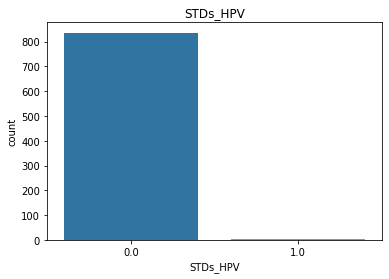

****************************************************************************************************


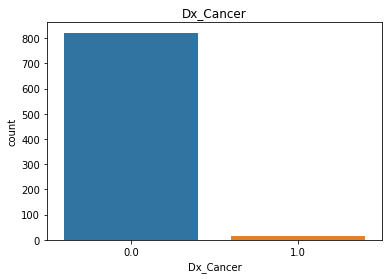

****************************************************************************************************


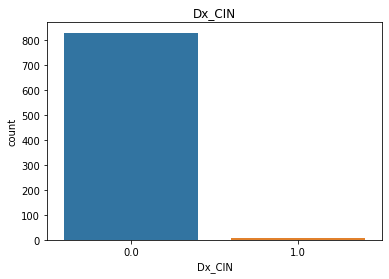

****************************************************************************************************


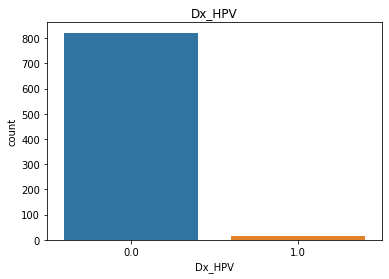

****************************************************************************************************


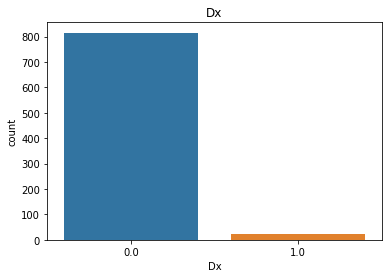

****************************************************************************************************


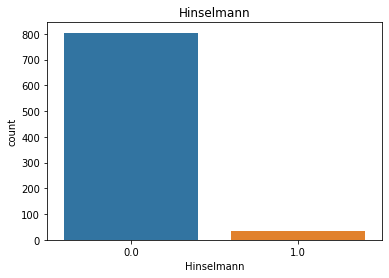

****************************************************************************************************


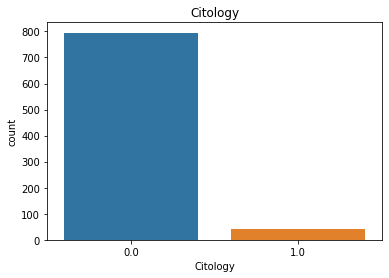

****************************************************************************************************


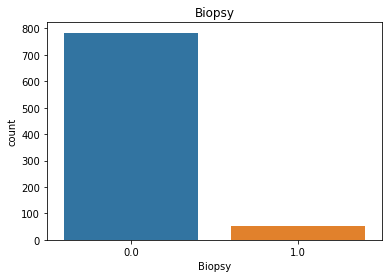

In [112]:
print("Count Plots of Categorical Columns");print()
for i in impute[x_features_categorical]:
        print('*'*100)
        sns.countplot(impute[i])
        plt.title(i)
        plt.show()

Density Plots

****************************************************************************************************


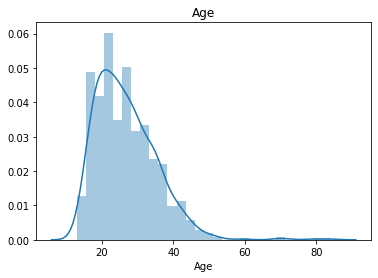

****************************************************************************************************


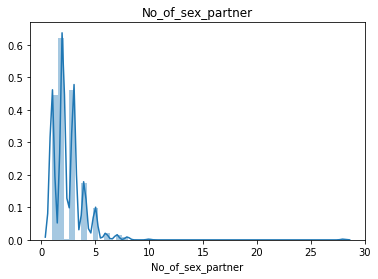

****************************************************************************************************


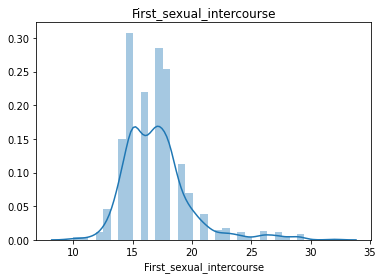

****************************************************************************************************


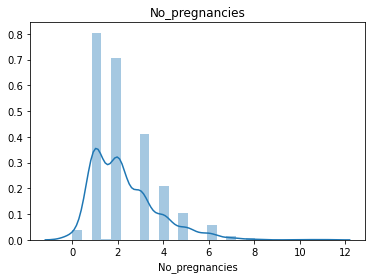

****************************************************************************************************


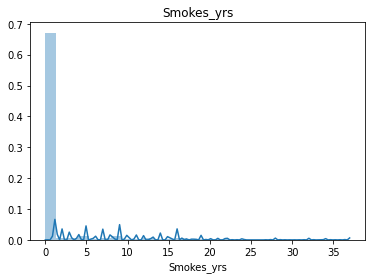

****************************************************************************************************


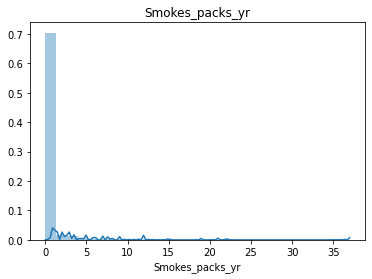

****************************************************************************************************


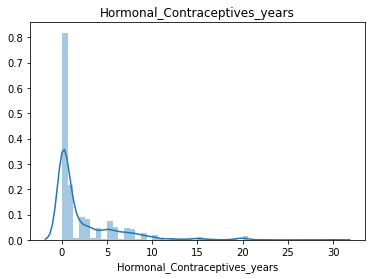

****************************************************************************************************


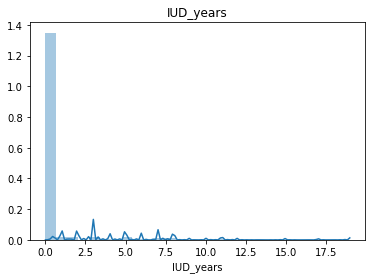

****************************************************************************************************


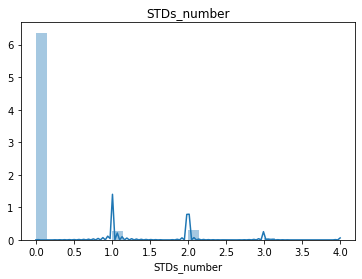

****************************************************************************************************


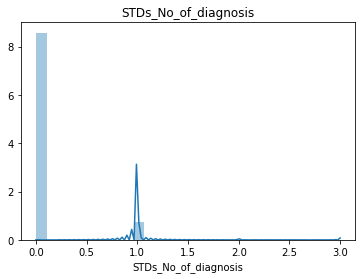

****************************************************************************************************


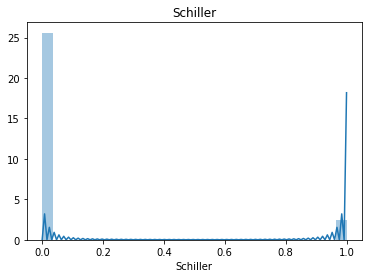

In [113]:
print("Density Plots");print()
for i in impute[x_features_numerical]:
        print('*'*100)
        sns.distplot(impute[i])
        plt.title(i)
        plt.show()


## Multivariate Analysis 

Binning the columns that deals with years

In [0]:
impute[x_features_categorical]=impute[x_features_categorical].replace(0,'no')
impute[x_features_categorical]=impute[x_features_categorical].replace(1,'yes')

impute.Smokes_yrs=impute.Smokes_yrs.astype('float64')
impute.IUD_years=impute.IUD_years.astype('float64')
impute.Smokes_packs_yr=impute.Smokes_packs_yr.astype('float64')
impute['smokes_yr_cat']=pd.cut(impute.Smokes_yrs,[-1,2,5,10,15,20,25,50],labels=['<2','2-5','5-10','10-15','15-20','20-25','>25'])
impute=impute.drop(['Smokes_yrs'],axis=1)
impute['smokepack_yr_cat']=pd.cut(impute.Smokes_packs_yr,[-1,2,5,10,20,50],labels=['<2','2-5','5-10','10-20','>20'])
impute=impute.drop(['Smokes_packs_yr'],axis=1)
impute['IUD_years_bin']=pd.cut(impute.IUD_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])
impute=impute.drop(['IUD_years'],axis=1)
impute['Hormonal_years_bin']=pd.cut(impute.Hormonal_Contraceptives_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])

### i) Age and Sexual Habits vs Biopsy

##### No_of_sex_partner - Total number of sexual partners the patient had.
##### First_sexual_intercourse - The age when the patient had their first sexual intercourse
##### No_pregnancies - Total number of pregnancies the patient had

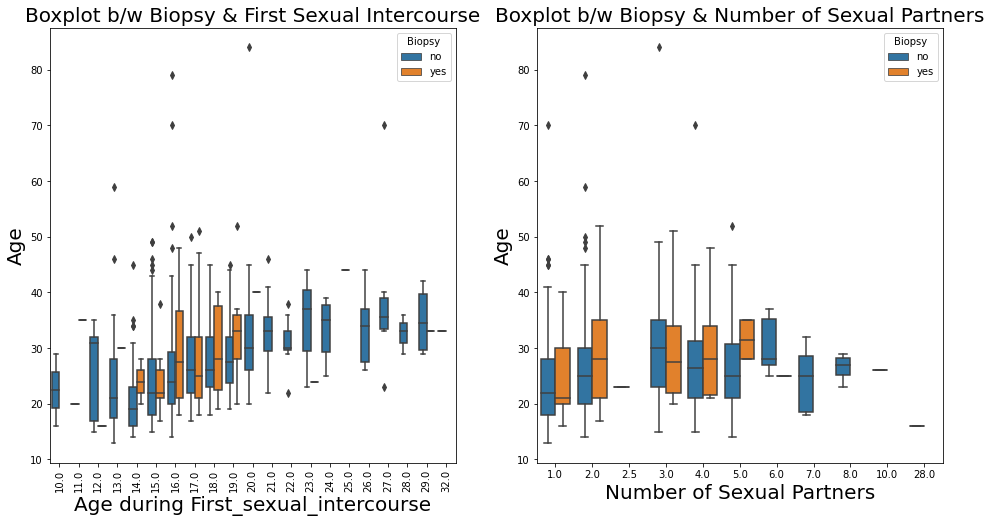

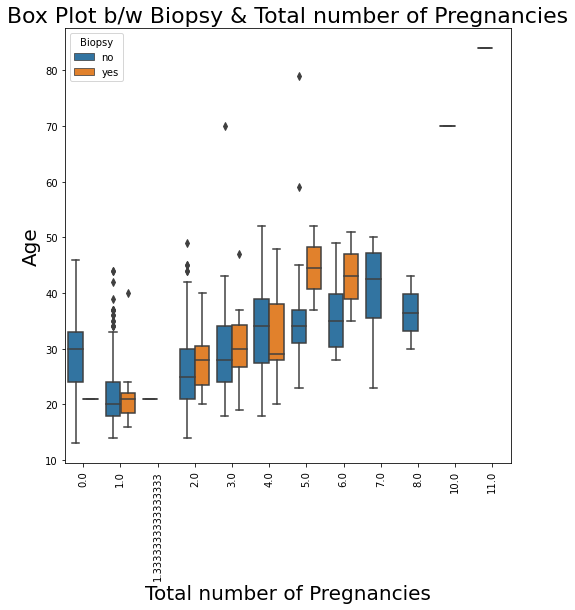

In [115]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=impute['First_sexual_intercourse'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Boxplot b/w Biopsy & First Sexual Intercourse",fontsize=20)
a.set_xlabel("Age during First_sexual_intercourse",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Boxplot b/w Biopsy & Number of Sexual Partners',fontsize=20)
a=sns.boxplot(x=impute['No_of_sex_partner'],y=impute['Age'], hue=impute['Biopsy'])
a.set_xlabel("Number of Sexual Partners",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
a=sns.boxplot(x=impute['No_pregnancies'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=22)
a.set_xlabel('Total number of Pregnancies',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

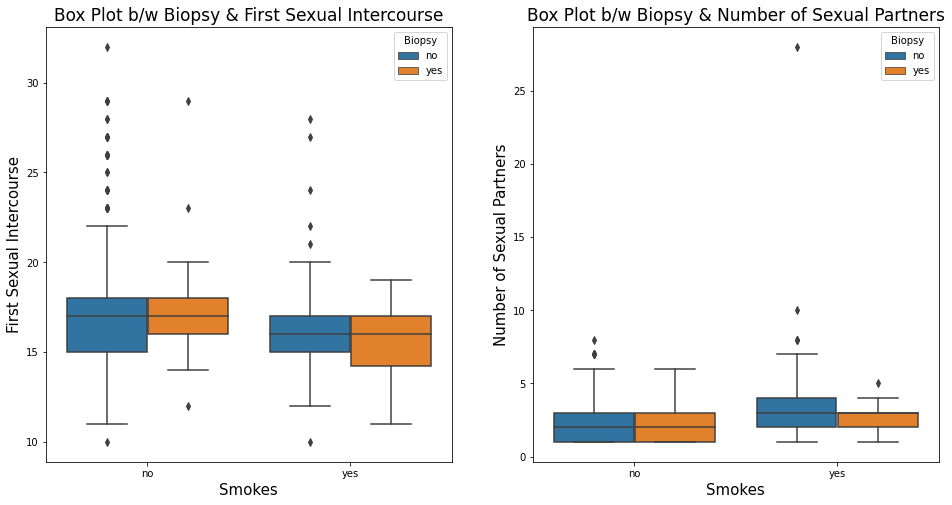

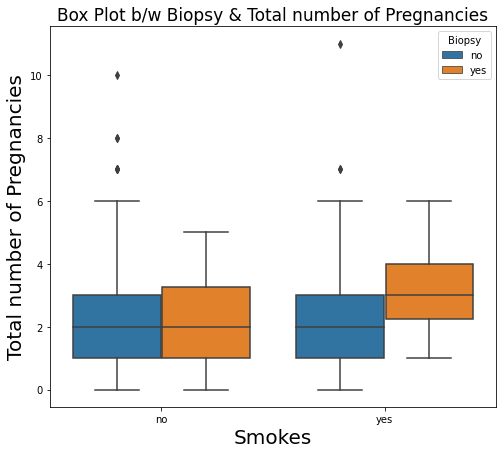

In [116]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(y=impute['First_sexual_intercourse'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & First Sexual Intercourse",fontsize=17)
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("First Sexual Intercourse",fontsize=15)
plt.subplot(1,2,2)
plt.title('Box Plot b/w Biopsy & Number of Sexual Partners',fontsize=17)
a=sns.boxplot(y=impute['No_of_sex_partner'],hue=impute['Biopsy'],x=impute['Smokes'])
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("Number of Sexual Partners",fontsize=15)
plt.figure(figsize=(8,7))
a=sns.boxplot(y=impute['No_pregnancies'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=17)
a.set_xlabel('Smokes',fontsize=20)
a.set_ylabel("Total number of Pregnancies",fontsize=20)
plt.show()

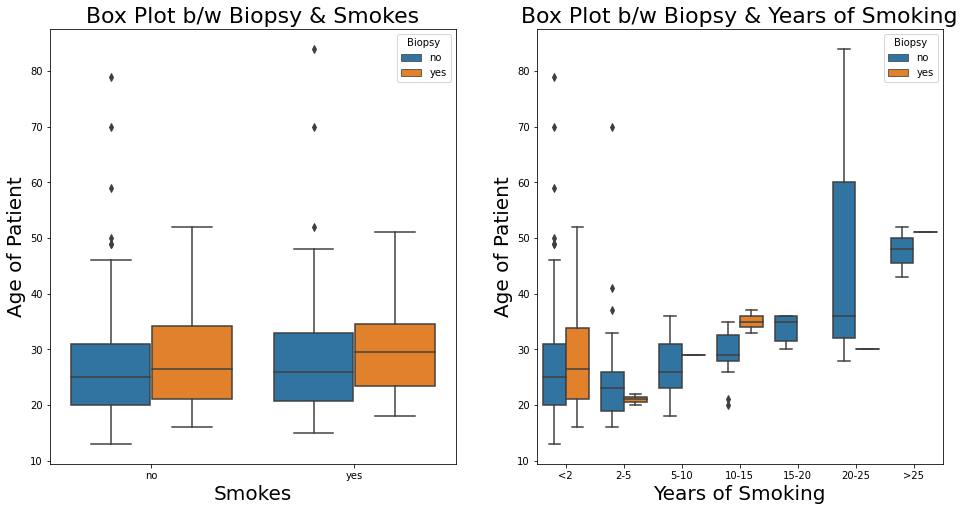

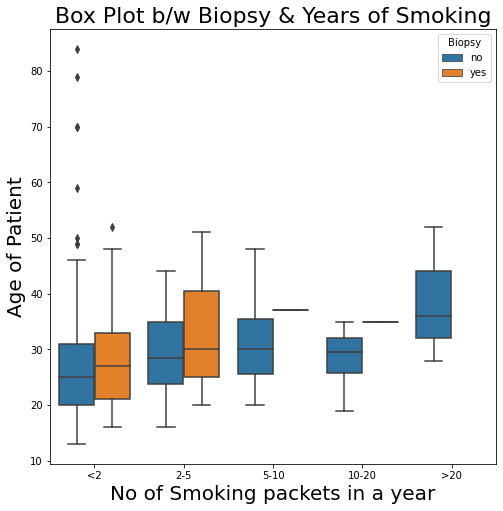

In [117]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['Smokes'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Smokes",fontsize=22)
b.set_xlabel("Smokes",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.subplot(1,2,2)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokes_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("Years of Smoking",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokepack_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("No of Smoking packets in a year",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()

### iii) Birth control attributes & Age vs Biopsy

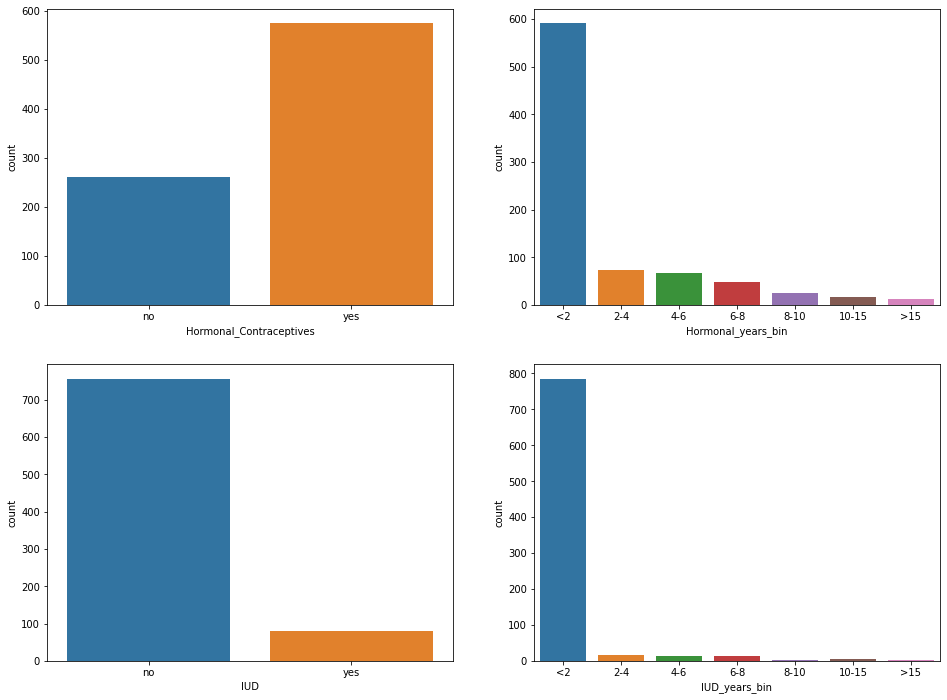

In [118]:
plt.subplots(2,2,figsize=(16,12))
plt.subplot(2,2,1)
sns.countplot(impute['Hormonal_Contraceptives'])
plt.subplot(2,2,2)
sns.countplot(impute['Hormonal_years_bin'])
plt.subplot(2,2,3)
sns.countplot(impute['IUD'])
plt.subplot(2,2,4)
sns.countplot(impute['IUD_years_bin'])

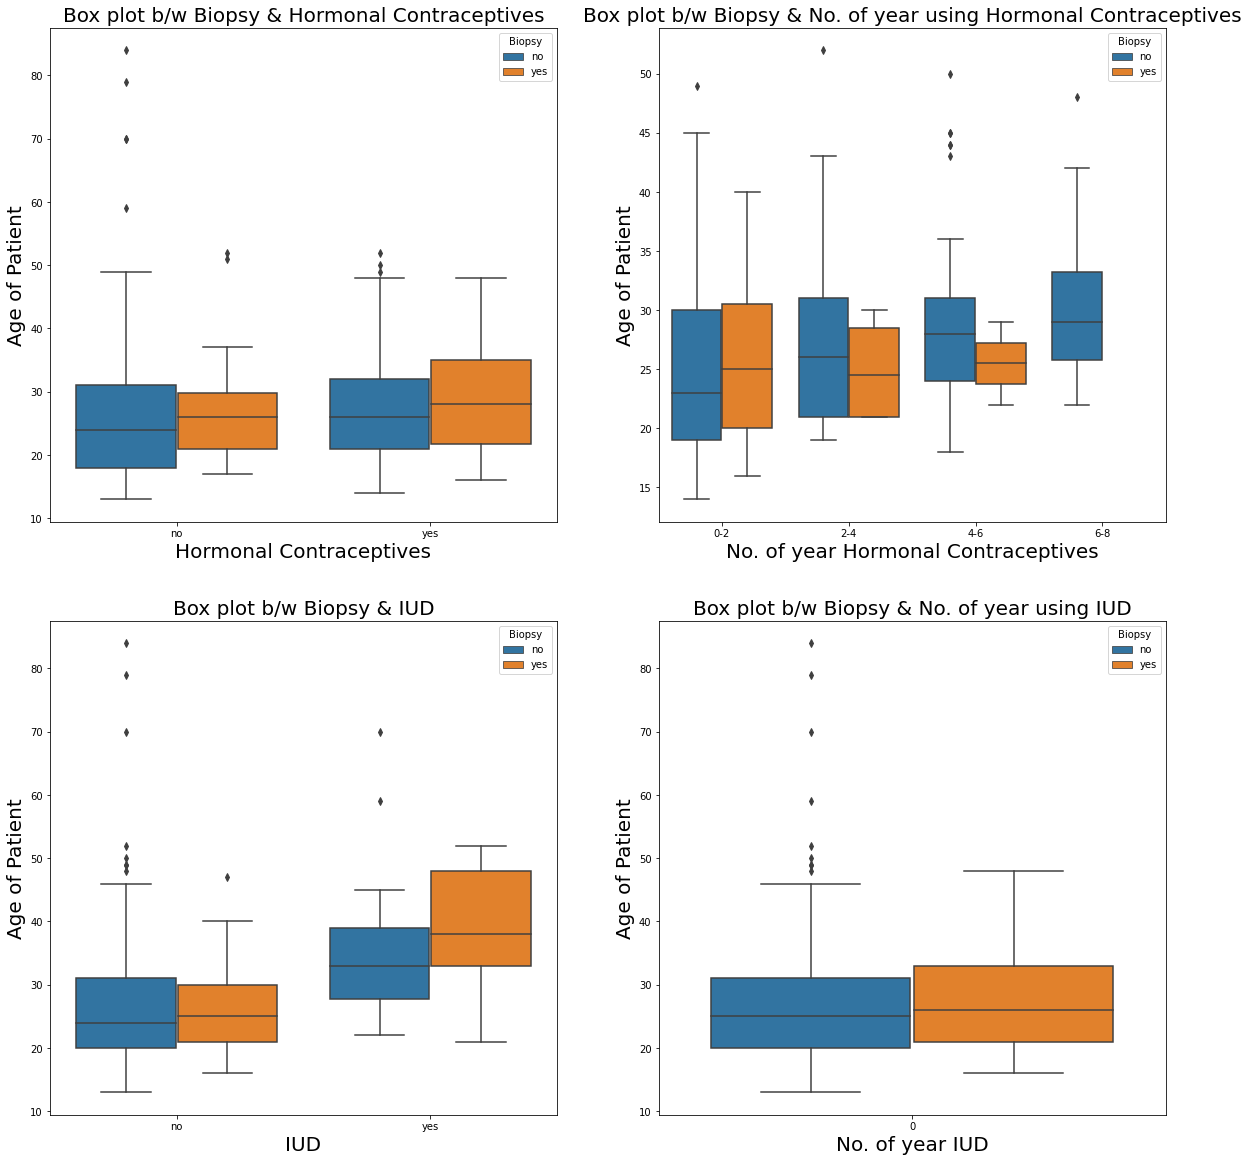

In [119]:
plt.subplots(2,2,figsize=(20,20))
plt.subplot(2,2,1)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['Hormonal_Contraceptives'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & Hormonal Contraceptives',fontsize=20)
c.set_xlabel('Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,2)
years=pd.cut(impute.Hormonal_Contraceptives_years,[0,2,4,6,8],labels=['0-2','2-4','4-6','6-8'])
c=sns.boxplot(x=years,y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using Hormonal Contraceptives',fontsize=20)
c.set_xlabel('No. of year Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,3)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['IUD'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & IUD',fontsize=20)
c.set_xlabel('IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,4)
c=sns.boxplot(x='IUD_years_bin',y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using IUD',fontsize=20)
c.set_xlabel('No. of year IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
c=sns.boxplot()
plt.show()

## iv) STD attributes & Age vs Biopsy


    STDs : Indicates the presence of Sexually Transmitted Diseases
    STDs_number : Indicates the total number of sexually transmitted disease present with the patient
    STDs_condylomatosis
    STDs_cervical_condylomatosis
    STDs_vaginal_condylomatosis
    STDs_vulvo_perineal_condylomatosis
    STDs_syphilis
    STDs_pelvic_inflammatory_disease
    STDs_genital_herpes
    STDs_molluscum_contagiosum
    STDs_AIDS
    STDs_HIV
    STDs_Hepatitis_B
    STDs_HPV
    STDs_No_of_diagnosis

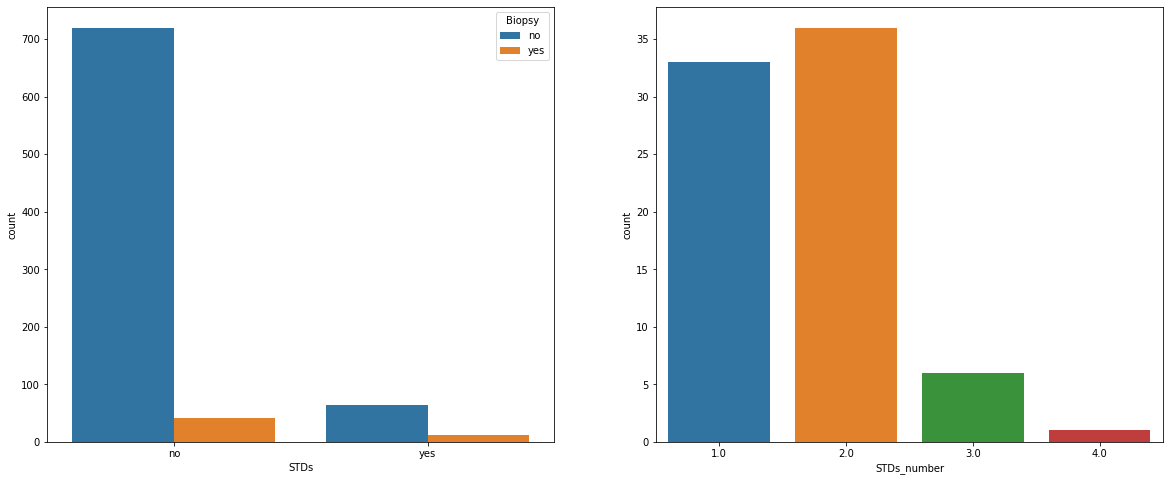

In [120]:
plt.subplots(1,2, figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(impute['STDs'], hue=impute['Biopsy'])
plt.subplot(1,2,2)
sns.countplot(impute['STDs_number'][impute['STDs_number']>0])

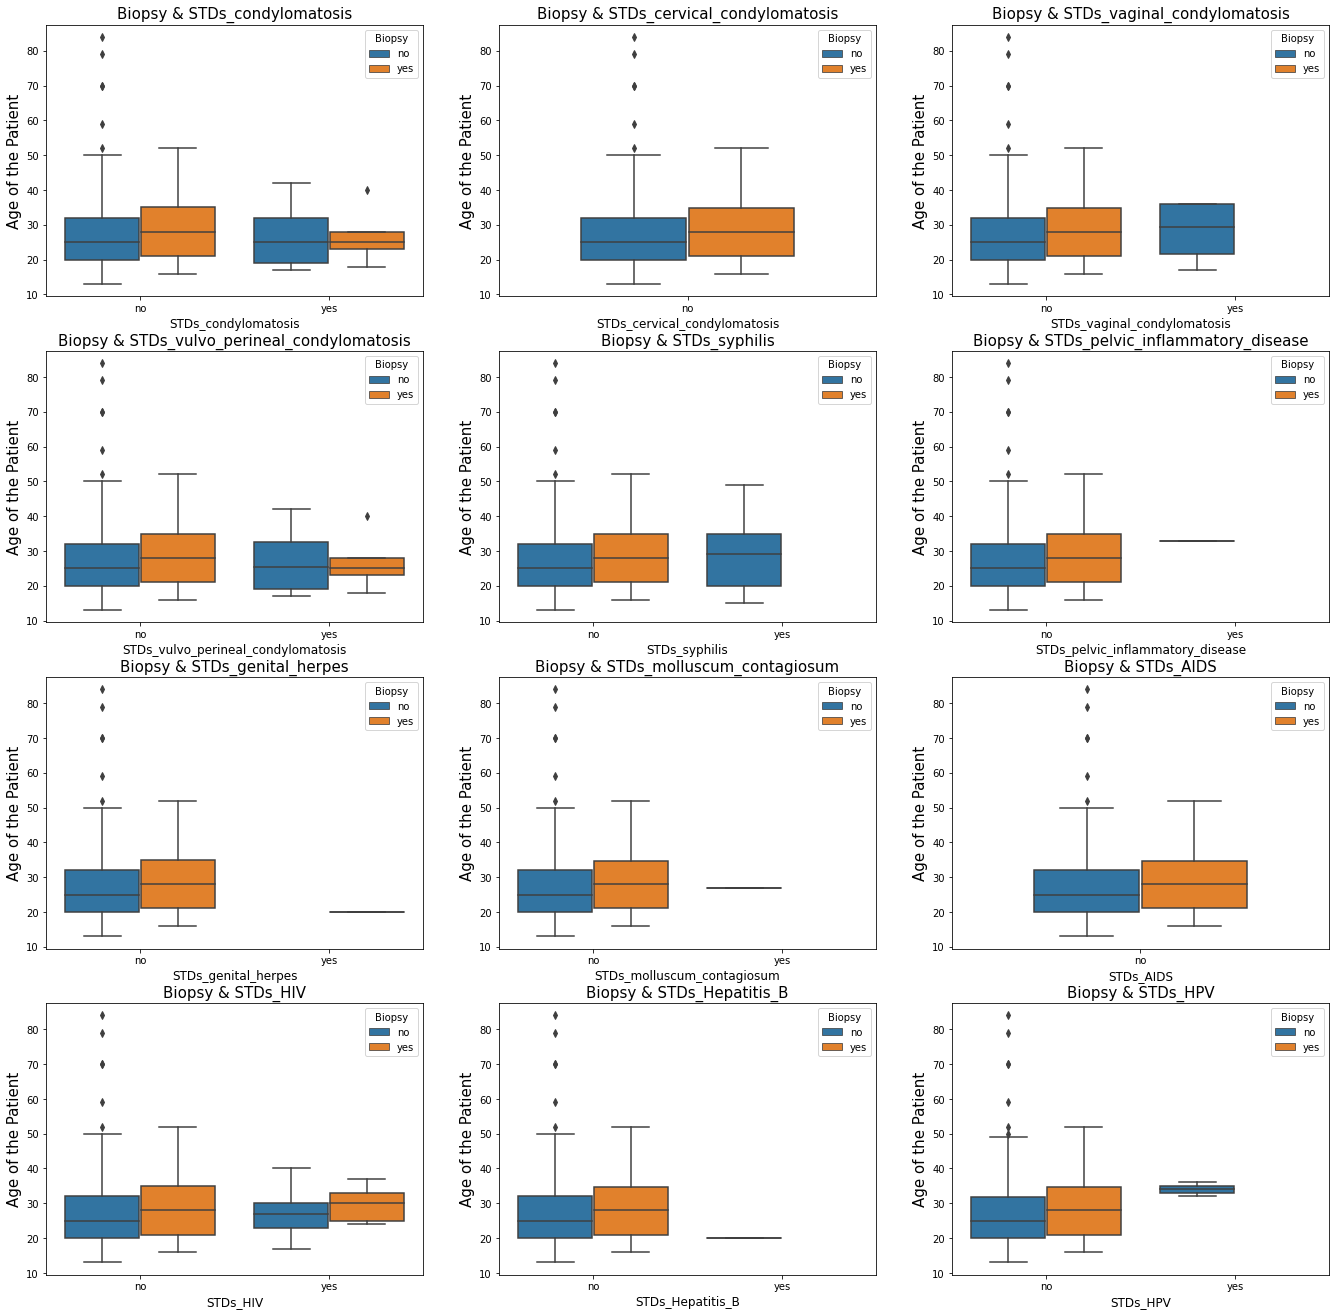

In [121]:
plt.subplots(4,3,figsize=(23,23))
var=['Dummy','STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV']
for i in np.arange(1,13):
    plt.subplot(4,3,i)
    d=sns.boxplot(hue='Biopsy',x=var[i],y='Age',data=impute)
    d.axes.set_title('Biopsy & ' + var[i],fontsize=15)
    d.set_xlabel(var[i],fontsize=12)
    d.set_ylabel('Age of the Patient',fontsize=15)

# Feature Engineering

### Outlier Treatment

In [0]:
numerical=['Age','No_of_sex_partner','First_sexual_intercourse','No_pregnancies','Smokes_yrs','Smokes_packs_yr',
 'Hormonal_Contraceptives_years','IUD_years'] # --> Choosing the proper numerical features 

df_copy = df.copy()
df_copy[numerical]=df_copy[numerical].astype('float64')

Age                                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
No_of_sex_partner                 AxesSubplot(0.327174,0.71587;0.168478x0.16413)
First_sexual_intercourse          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
No_pregnancies                    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Smokes_yrs                          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Smokes_packs_yr                  AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Hormonal_Contraceptives_years    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
IUD_years                        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

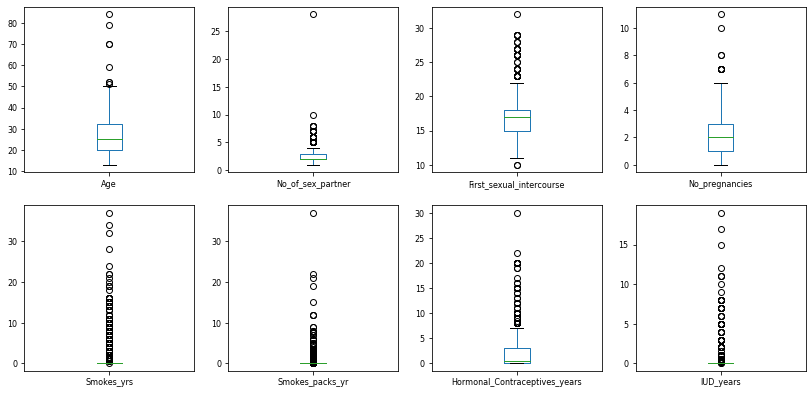

In [123]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

* The above graph implies that the data contains outliers

In [124]:
IQR=df_copy[numerical].describe().T['75%']-df_copy[numerical].describe().T['25%']

min,max=[df_copy[numerical].describe().T['25%']-(IQR*1.5),df_copy[numerical].describe().T['75%']+(IQR*1.5)]

for i in numerical:
    print('range of',i,'b/w',min[i],'and',max[i])

for i in numerical:
    df_copy[i][df_copy[i]>max[i]]=max[i]
    df_copy[i][df_copy[i]<min[i]]=min[i]

range of Age b/w 2.0 and 50.0
range of No_of_sex_partner b/w 0.5 and 4.5
range of First_sexual_intercourse b/w 10.5 and 22.5
range of No_pregnancies b/w -2.0 and 6.0
range of Smokes_yrs b/w 0.0 and 0.0
range of Smokes_packs_yr b/w 0.0 and 0.0
range of Hormonal_Contraceptives_years b/w -4.5 and 7.5
range of IUD_years b/w 0.0 and 0.0


* Here using IQR technique, we have capped the extreme values above the upper whiscur value to the value of upper whiscur and similarly capped the extreme lower values to the value of lower whiscur value

Age                                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
No_of_sex_partner                 AxesSubplot(0.327174,0.71587;0.168478x0.16413)
First_sexual_intercourse          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
No_pregnancies                    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Smokes_yrs                          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Smokes_packs_yr                  AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Hormonal_Contraceptives_years    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
IUD_years                        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

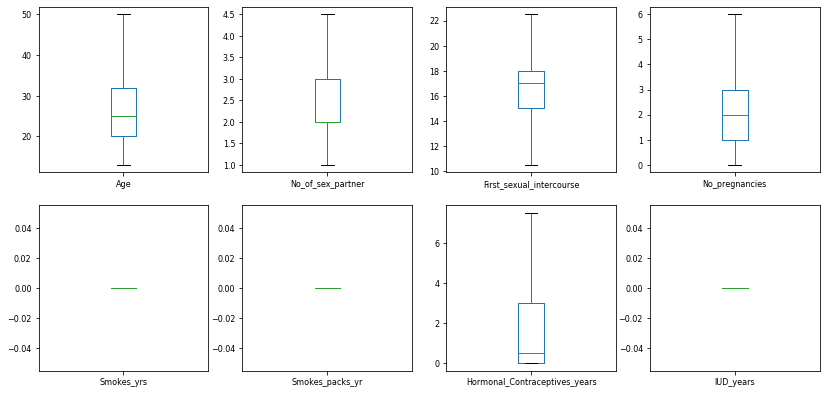

In [125]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

* Now the outliers has been removed/capped 

# Base Models

In [0]:
df = df.astype('float64')

x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)

l= []  #List to store the various model metrics 

In [0]:
def models_lr(x,y):
    mod = {}
    model = LogisticRegression().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_lr(x_train,y_train))

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_dt(x_train,y_train))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_rf(x_train,y_train))

def models_nb(x,y):
    mod = {}
    model = GaussianNB().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'GaussianNB'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_nb(x_train,y_train))

def models_knn(x,y):
    mod = {}
    model = KNeighborsClassifier().fit(x,y)
    ypred = model.predict(x_test1)
    mod['Model'] = 'KNN'
    mod['Train_Score'] = model.score(x_train1,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_knn(x_train1,y_train))

In [128]:
base_df = pd.DataFrame(l)
base_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,LogisticRegression,0.974403,0.952381,0.571429,0.533333,0.615385,0.756118
1,Decision Tree,1.000000,0.940476,0.615385,0.800000,0.500000,0.874684
2,Random Forest,1.000000,0.948413,0.628571,0.733333,0.550000,0.847679
3,GaussianNB,0.146758,0.095238,0.116279,1.000000,0.061728,0.518987
4,KNN,0.950512,0.936508,0.333333,0.266667,0.444444,0.622785


# Final Model and Optimizations

### Sampling

In [129]:
x_train_s, y_train_s = SMOTE(random_state=33).fit_resample(x_train, y_train.ravel())
print(sorted(Counter(y_train_s).items()))

[(0.0, 547), (1.0, 547)]


* Now 0 and 1 classes have same proportions

In [0]:
l_final = [] #--> New list for storing metrics of base models

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_dt(x_train_s,y_train_s))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest After Sampling'
    mod['Train_Score'] = model.score(x_train_s,y_train_s)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_final.append(models_rf(x_train_s,y_train_s))

In [131]:
final_model = pd.DataFrame(l_final)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.0,0.956349,0.717949,0.933333,0.583333,0.945570
1,Random Forest After Sampling,1.0,0.940476,0.571429,0.666667,0.500000,0.812236


### Feature Selection

In [132]:
for i in range(1,df.shape[1]):
   
    model = RFE(DecisionTreeClassifier(),i).fit(x,y)
    print(x.columns[model.support_])
    x_train,x_test,y_train,y_test = train_test_split(model.transform(x),y,test_size=0.3,random_state=0)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    dt_recall = metrics.roc_auc_score(y_test,y_pred)
    print(dt_recall)
    print('*'*100)

Index(['Schiller'], dtype='object')
0.9112554112554113
****************************************************************************************************
Index(['Age', 'Schiller'], dtype='object')
0.8008658008658008
****************************************************************************************************
Index(['Age', 'No_of_sex_partner', 'Schiller'], dtype='object')
0.7077922077922078
****************************************************************************************************
Index(['Age', 'No_of_sex_partner', 'No_pregnancies', 'Schiller'], dtype='object')
0.6666666666666666
****************************************************************************************************
Index(['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Schiller'],
      dtype='object')
0.8203463203463203
****************************************************************************************************
Index(['Age', 'No_of_sex_partner', 'First_sexual_int

In [133]:
rfe_dt = ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD_years',
       'STDs', 'STDs_number', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV', 'STDs_HPV',
       'STDs_No_of_diagnosis', 'Dx_CIN', 'Schiller', 'Citology']  # Set of features with high recall score

len(rfe_dt)

21

In [134]:
for i in range(1,df.shape[1]):
   
    model = RFE(RandomForestClassifier(),i).fit(x,y)
    print(x.columns[model.support_])
    x_train,x_test,y_train,y_test = train_test_split(model.transform(x),y,test_size=0.3,random_state=0)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    rf_recall = metrics.roc_auc_score(y_test,y_pred)
    print(rf_recall)
    print('*'*100)

Index(['Schiller'], dtype='object')
0.9112554112554113
****************************************************************************************************
Index(['Age', 'Schiller'], dtype='object')
0.8722943722943723
****************************************************************************************************
Index(['Age', 'First_sexual_intercourse', 'Schiller'], dtype='object')
0.7987012987012986
****************************************************************************************************
Index(['Age', 'First_sexual_intercourse', 'Hormonal_Contraceptives_years',
       'Schiller'],
      dtype='object')
0.7922077922077921
****************************************************************************************************
Index(['Age', 'First_sexual_intercourse', 'Hormonal_Contraceptives_years',
       'Hinselmann', 'Schiller'],
      dtype='object')
0.8225108225108224
****************************************************************************************************
In

In [135]:
rfe_rf= ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs_number', 'STDs_condylomatosis',
       'STDs_genital_herpes', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology']  # Set of features with high recall score

len(rfe_rf)

19

In [0]:
x_train_s = pd.DataFrame(x_train_s, columns = x.columns)
y_train_s = pd.DataFrame(y_train_s, columns = ['Biopsy'])
x_test = pd.DataFrame(x_test, columns=x.columns)

rfe_dt_df_train = x_train_s[rfe_dt]
rfe_dt_df_test = x_test[rfe_dt]
rfe_rf_df_train = x_train_s[rfe_rf]
rfe_rf_df_test = x_test[rfe_rf]

l_feature = [] 
def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree after Feature Selection'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_feature.append(models_dt(rfe_dt_df_train,y_train_s.values))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(rfe_rf_df_test)
    mod['Model'] = 'Random Forest after Feature Selection'
    mod['Train_Score'] = model.score(rfe_rf_df_train.values,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_rf_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_feature.append(models_rf(rfe_rf_df_train.values,y_train_s.values))

In [137]:
final_model = final_model.append(l_feature)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.000000,0.956349,0.717949,0.933333,0.583333,0.945570
1,Random Forest After Sampling,1.000000,0.940476,0.571429,0.666667,0.500000,0.812236
0,Decision Tree after Feature Selection,1.000000,0.988095,0.930233,0.952381,0.909091,0.971861
1,Random Forest after Feature Selection,0.999086,0.992063,0.952381,0.952381,0.952381,0.974026


### Hyper Parameter Tuning

In [138]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],  
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train_s.values)
best_parameter_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [139]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

grid = RandomizedSearchCV(rf, rf_params, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train_s.values)
best_parameter_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 7,
 'n_estimators': 70}

In [0]:
l_hyper = []

def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = 'auto', random_state = 123, splitter = 'best').fit(x,y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree after Hyperparameter Tuning'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_hyper.append(models_dt(rfe_dt_df_train,y_train_s.values))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier(criterion= 'gini', max_depth = 9, max_features = 'log2', max_leaf_nodes=9, n_estimators=50).fit(x,y)
    ypred = model.predict(rfe_rf_df_test)
    mod['Model'] = 'Random Forest After Hyperparameter Tuning'
    mod['Train_Score'] = model.score(rfe_rf_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_rf_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_hyper.append(models_rf(rfe_rf_df_train,y_train_s.values))

In [141]:
final_model = final_model.append(l_hyper)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree After Sampling,1.000000,0.956349,0.717949,0.933333,0.583333,0.945570
1,Random Forest After Sampling,1.000000,0.940476,0.571429,0.666667,0.500000,0.812236
0,Decision Tree after Feature Selection,1.000000,0.988095,0.930233,0.952381,0.909091,0.971861
1,Random Forest after Feature Selection,0.999086,0.992063,0.952381,0.952381,0.952381,0.974026
0,Decision Tree after Hyperparameter Tuning,0.979890,0.960317,0.800000,0.952381,0.689655,0.956710
1,Random Forest After Hyperparameter Tuning,0.975320,0.964286,0.816327,0.952381,0.714286,0.958874


## Ensembling

### Bagging

In [0]:
l_ensemble=[]

#only for hyper tuned decision tree as random forest is by default a bagged model

def bagg(x,y):
    mod = {}
    model = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = 'auto', random_state = 123, splitter = 'best')).fit(x, y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Bagged Decision Tree with Hyperparameter'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_ensemble.append(bagg(rfe_dt_df_train,y_train_s.values))

## Boosting

###  AdaBoost

In [0]:
def ada(x,y):
    mod = {}
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth = 4, max_features = 'auto', random_state = 123, splitter = 'best')).fit(x, y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Decision Tree ADA Boost with Hyperparameter'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_ensemble.append(ada(rfe_dt_df_train,y_train_s.values))

### Gradient Boost

In [0]:
def gb(x,y):
    mod = {}
    model = GradientBoostingClassifier(learning_rate=0.01,random_state=1).fit(x, y)
    ypred = model.predict(rfe_dt_df_test)
    mod['Model'] = 'Gradient Boost'
    mod['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(rfe_dt_df_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l_ensemble.append(gb(rfe_dt_df_train,y_train_s.values))

In [146]:
final_model = final_model.append(l_ensemble)
final_model.index = range(1,len(final_model)+1)
final_model

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
1,Decision Tree After Sampling,1.000000,0.956349,0.717949,0.933333,0.583333,0.945570
2,Random Forest After Sampling,1.000000,0.940476,0.571429,0.666667,0.500000,0.812236
3,Decision Tree after Feature Selection,1.000000,0.988095,0.930233,0.952381,0.909091,0.971861
4,Random Forest after Feature Selection,0.999086,0.992063,0.952381,0.952381,0.952381,0.974026
5,Decision Tree after Hyperparameter Tuning,0.979890,0.960317,0.800000,0.952381,0.689655,0.956710
6,Random Forest After Hyperparameter Tuning,0.975320,0.964286,0.816327,0.952381,0.714286,0.958874
7,Bagged Decision Tree with Hyperparameter,0.984461,0.956349,0.765957,0.857143,0.692308,0.911255
8,Decision Tree ADA Boost with Hyperparameter,1.000000,0.984127,0.900000,0.857143,0.947368,0.926407
9,Gradient Boost,0.977148,0.972222,0.851064,0.952381,0.769231,0.963203
10,Bagged Decision Tree with Hyperparameter,0.984461,0.956349,0.765957,0.857143,0.692308,0.911255
